In [1]:
from google.colab import drive

drive.mount('/content/drive')
%cd drive
%cd MyDrive
%cd ML_Practicals

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/ML_Practicals


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

%matplotlib inline

print('Tensorflow Version : ', tf.__version__)

Tensorflow Version :  2.8.2


In [3]:
raw_df = pd.read_csv('Seed_Data.csv', na_values=' ', comment='\t', skipinitialspace=True)
df = raw_df.copy()
df.tail()

,A,P,C,LK,WK,A_Coef,LKG,target
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,2


In [4]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

train_label = train_df.pop('target')
test_label = test_df.pop('target')

In [5]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A,168.0,14.850060,2.850291,10.5900,12.29000,14.44500,17.140000,20.9700
P,168.0,14.560952,1.275165,12.4100,13.46500,14.38000,15.662500,17.2500
C,168.0,0.871299,0.024270,0.8081,0.85730,0.87395,0.887925,0.9183
LK,168.0,5.625387,0.433835,4.8990,5.26275,5.53400,5.984500,6.6750
WK,168.0,3.259893,0.374640,2.6480,2.95100,3.25150,3.531750,4.0320
A_Coef,168.0,3.641721,1.527259,0.7651,2.46175,3.52950,4.685500,8.4560
LKG,168.0,5.399649,0.491331,4.5190,5.04400,5.22050,5.877000,6.5500


In [6]:
def normalize(df):
  return (df - np.mean(train_df))/np.std(train_df)

normed_train_df = normalize(train_df)
normed_test_df = normalize(test_df)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(96, activation='relu', input_shape=[len(train_df.keys())]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [8]:
cce = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(
    loss = cce,
    optimizer = tf.keras.optimizers.RMSprop(0.001),
    metrics = ['accuracy']
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                6208      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 9,155
Trainable params: 9,155
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.callbacks import EarlyStopping

EPOCHS = 100
es = EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    verbose = 1,
    patience = 5
)
history = model.fit(
    normed_train_df,
    train_label,
    epochs = EPOCHS,
    validation_split = 0.2,
    verbose = 1,
    callbacks = [es]
)

Epoch 1/100
5/5 [==============================] - 2s 125ms/step - loss: 0.9519 - accuracy: 0.6716 - val_loss: 0.6814 - val_accuracy: 0.9706
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6557 - accuracy: 0.9179 - val_loss: 0.5077 - val_accuracy: 0.9706
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.5119 - accuracy: 0.9104 - val_loss: 0.3962 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.4155 - accuracy: 0.9030 - val_loss: 0.3150 - val_accuracy: 0.9706
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.3473 - accuracy: 0.9104 - val_loss: 0.2533 - val_accuracy: 0.9706
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.3050 - accuracy: 0.9104 - val_loss: 0.2174 - val_accuracy: 0.9706
Epoch 7/100
5/5 [==============================] - 0s 33ms/step - loss: 0.2776 - accuracy: 0.9179 - val_loss: 0.1959 - val_accuracy: 0.9706
Epoch 8/100
5/5 [==

In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
21,0.143085,0.940298,0.130983,0.970588,21
22,0.154033,0.932836,0.103472,0.970588,22
23,0.135828,0.932836,0.094712,0.970588,23
24,0.140306,0.940298,0.107304,0.970588,24
25,0.131672,0.940298,0.128121,0.970588,25


In [12]:
test_predictions = model.predict(normed_test_df)
test_predictions

array([[8.47223759e-01, 1.50346056e-01, 2.43018102e-03],
       [9.42525089e-01, 2.04765480e-02, 3.69984210e-02],
       [9.94878411e-01, 4.69310395e-03, 4.28478030e-04],
       [8.79694641e-01, 9.43631865e-03, 1.10869095e-01],
       [7.88386345e-01, 5.43594472e-02, 1.57254189e-01],
       [5.85196376e-01, 4.02714282e-01, 1.20893400e-02],
       [6.59877896e-01, 8.35031364e-03, 3.31771821e-01],
       [9.42407012e-01, 4.23971266e-02, 1.51958521e-02],
       [9.82459784e-01, 1.42077627e-02, 3.33248940e-03],
       [9.78132844e-01, 8.01853463e-03, 1.38486698e-02],
       [1.60022080e-02, 9.83819067e-01, 1.78754504e-04],
       [4.89610173e-02, 9.50131655e-01, 9.07352311e-04],
       [5.67453622e-04, 9.99432147e-01, 3.51436029e-07],
       [1.28131106e-01, 8.70602787e-01, 1.26603048e-03],
       [1.36684850e-02, 9.86286342e-01, 4.51827873e-05],
       [1.59004133e-03, 9.98408377e-01, 1.72353566e-06],
       [2.05845083e-03, 9.97938335e-01, 3.24756320e-06],
       [1.12362043e-03, 9.98876

In [13]:
pred = []

for i in range(len(test_predictions)):
  pred.append(test_predictions[i].argmax())

print(pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2]


In [14]:
actual = [i for i in test_label]
print(actual)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [15]:
con_mat = tf.math.confusion_matrix(labels=actual, predictions=pred).numpy()
con_df = pd.DataFrame(con_mat)

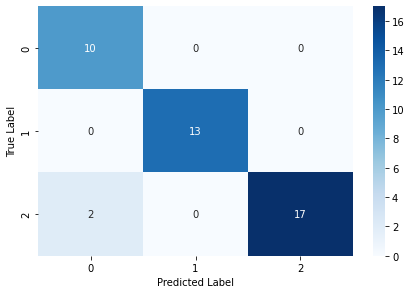

In [16]:
import seaborn as sns

sns.heatmap(con_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()